# **Fire Intervention Data Analysis**

**The task in this notebook will be to extract , perfor cleaning transformations and the do some preliminary analysis about the distribution of the different type of fire interventions(6 types ) across all the boroughs of the city of Montreal.**

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import calendar
import seaborn as sns

**The fire interventions datasets are obtained from the open data portal of "Ville de Montreal". The data is available from the years 2005 -2018 and is broken down into 2 datasets. The first one had data from 2005 - 2014 and the the second one has data from 2015 - 2018. It should be noted that at the time of the analysis the data for the year 2018 was incomplete and was only available for the firt 3 months.  The dataset is now updated to include all the months of 2018 and the first few montha of 2019, but since this update was done while the project was coming to an end we will ignore this extra data.**

In [0]:
# importing the 2 datasets
df1 = pd.read_csv('donneesouvertes-interventions-sim-2005-2014.csv')
df2 = pd.read_csv('donneesouvertes-interventions-sim (2).csv')


In [4]:
df1.columns

Index(['INCIDENT_NBR', 'CREATION_DATE_TIME', 'INCIDENT_TYPE_DESC',
       'DESCRIPTION_GROUPE', 'CASERNE', 'NOM_VILLE', 'NOM_ARROND', 'DIVISION',
       'LATITUDE', 'LONGITUDE', 'NOMBRE_UNITES'],
      dtype='object')

In [5]:
df2.columns

Index(['incident_nbr', 'creation_date_time', 'incident_type_desc',
       'description_groupe', 'caserne', 'nom_ville', 'nom_arrond', 'division',
       'latitude', 'longitude', 'nombre_unites'],
      dtype='object')

In [6]:
# the 2 datasets have slighttly different column name cases that need to be matched inorder to merge them

df1.columns = ['incident_nbr', 'creation_date_time', 'incident_type_desc',
       'description_groupe', 'caserne', 'nom_ville', 'nom_arrond', 'division',
       'latitude', 'longitude', 'nombre_unites']
df = pd.concat([df1,df2],axis=0)
df.head()


,incident_nbr,creation_date_time,incident_type_desc,description_groupe,caserne,nom_ville,nom_arrond,division,latitude,longitude,nombre_unites
0,1,2005-01-01 00:03:47,Inondation,Sans incendie,18,Montréal-Nord,Montréal-Nord,21,45.620274,-73.619956,1.0
1,2,2005-01-01 00:03:56,Alarme privé ou locale,Alarmes-incendies,10,Montréal,Ville-Marie / Parc Jean-Drapeau / Centre-Sud,18,45.494087,-73.582587,7.0
2,3,2005-01-01 00:03:57,Alarme privé ou locale,Alarmes-incendies,72,Saint-Laurent,St-Laurent,13,45.484406,-73.693038,6.0
3,4,2005-01-01 00:05:01,Inondation,Sans incendie,13,Montréal,Mercier / Hochelaga-Maisonneuve,23,45.541383,-73.545944,1.0
4,5,2005-01-01 00:06:20,Inondation,Sans incendie,18,Montréal-Nord,Montréal-Nord,21,45.611304,-73.632440,1.0


In [8]:
df.describe()

,incident_nbr,caserne,division,latitude,longitude,nombre_unites
count,1.298687e+06,1.298687e+06,1.298687e+06,1.298686e+06,1.298686e+06,1.298186e+06
mean,5.517900e+04,3.825980e+01,9.597768e+00,4.552540e+01,-7.362440e+01,2.020222e+00
std,3.568367e+04,2.068144e+01,6.081031e+00,6.934249e-02,8.494073e-02,2.364177e+00
min,1.000000e+00,3.000000e+00,0.000000e+00,0.000000e+00,-7.623729e+01,1.000000e+00
25%,2.433400e+04,2.000000e+01,5.000000e+00,4.548555e+01,-7.364858e+01,1.000000e+00
50%,5.025300e+04,3.700000e+01,8.000000e+00,4.552113e+01,-7.360499e+01,1.000000e+00
75%,8.453150e+04,5.500000e+01,1.200000e+01,4.556075e+01,-7.356972e+01,2.000000e+00
max,1.316730e+05,7.900000e+01,2.500000e+01,4.570346e+01,-7.347926e+01,2.750000e+02


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1298687 entries, 0 to 390200
Data columns (total 11 columns):
incident_nbr          1298687 non-null int64
creation_date_time    1298687 non-null object
incident_type_desc    1298687 non-null object
description_groupe    1298687 non-null object
caserne               1298687 non-null int64
nom_ville             1298687 non-null object
nom_arrond            1298687 non-null object
division              1298687 non-null int64
latitude              1298686 non-null float64
longitude             1298686 non-null float64
nombre_unites         1298186 non-null float64
dtypes: float64(3), int64(3), object(5)
memory usage: 118.9+ MB


/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:780: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:781: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


<function matplotlib.pyplot.show>

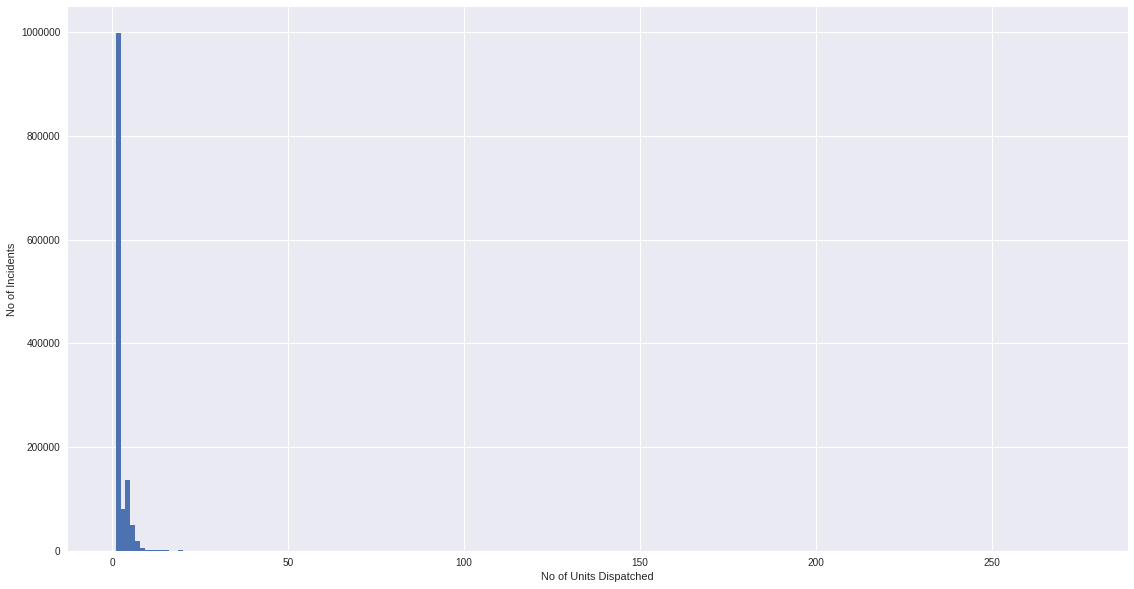

In [18]:
plt.figure(figsize=(19,10))
plt.hist(df['nombre_unites'], bins = 200)
plt.xlabel('No of Units Dispatched')
plt.ylabel('No of Incidents')
plt.show

From the figure above we notice that the number of units dispatched for the majority of the incidents is 1.

In [24]:
df[df['nombre_unites'] > 1].incident_nbr.count()

445114

In [25]:
df[df['nombre_unites'] ==1].incident_nbr.count()

853072

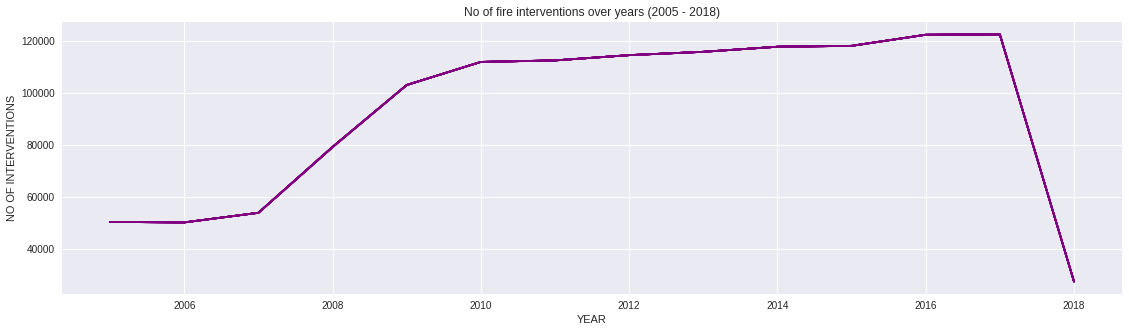

In [52]:
#Setting the date time as the index
df['creation_datetime'] = pd.to_datetime(df['creation_date_time'])
df = df.set_index('creation_datetime')

year_incidents = df.groupby(df.index.year).count()
plt.figure(figsize=(19,5))
plt.plot(year_incidents, c='purple')
plt.title("No of fire interventions over years (2005 - 2018)")
plt.xlabel("YEAR")
plt.ylabel("NO OF INTERVENTIONS")
plt.show()

**Due to the Diminishing nuber of fire related incidents most of the firefighter were on the verge of loosing their jobs. Inorder to save these jobs around the year 2007 the city of Montreal started gradually assigning first respondent incidents to  the fire department and train the firefighters with the skills to tackle these interventions. Due to this we see a spike in the number of incidents during these years. The trend only seems to settle down around the year 2010. Since the data from the year 2005 - 2009 is not representative of the actual trend , these years will not be considered  in the analysis. Also the steep fall in the year 2018 is due to incomplete data for that year hence the year 2018 is also ignored in the analysis**

In [0]:
# The analysis will only include data from 2010 to 2017
fire_df = df['2010-01-01' :'2017-12-31']

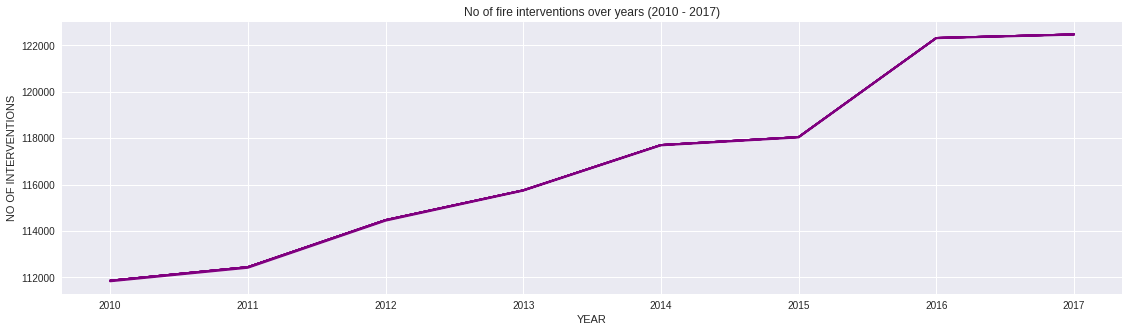

In [53]:

year_incidents = fire_df.groupby(fire_df.index.year).count()
plt.figure(figsize=(19,5))
plt.plot(year_incidents, c='purple')
plt.title("No of fire interventions over years (2010 - 2017)")
plt.xlabel("YEAR")
plt.ylabel("NO OF INTERVENTIONS")
plt.show()

**The trend here though increasing is not as steep.**

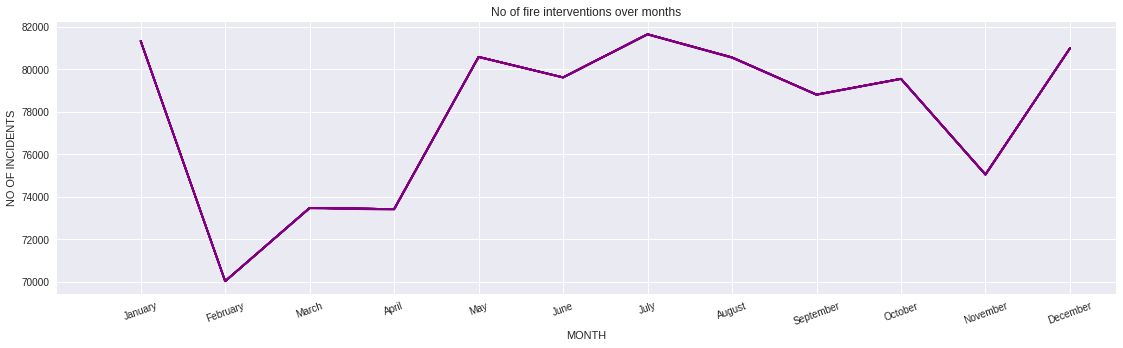

In [51]:
month_incidents = fire_df.groupby(fire_df.index.month).count()
plt.figure(figsize=(19,5))
plt.title("No of fire interventions over months")
plt.plot(month_incidents,c='purple')
plt.xlabel("MONTH")
plt.ylabel("NO OF INCIDENTS")
plt.xticks(np.arange(13), calendar.month_name[0:13], rotation=20)
plt.show()

**The No of interventions seem to be the lowest from Feb to April . There seems to be spike of the incidents in extreme temperature (July which is the hottest month and Dec,Jan the coldest months)**

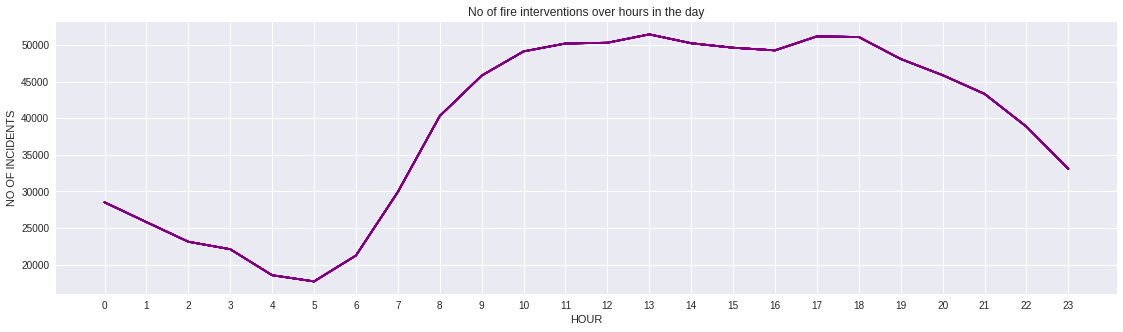

In [56]:
hour_incidents = fire_df.groupby(fire_df.index.hour).count()
plt.figure(figsize=(19,5))
plt.title("No of fire interventions over hours in the day")
plt.plot(hour_incidents,c='purple')
plt.xlabel("HOUR")
plt.ylabel("NO OF INCIDENTS")
plt.xticks(np.arange(24))
plt.show()

**The no of inteventions seem to peak during office hours.**

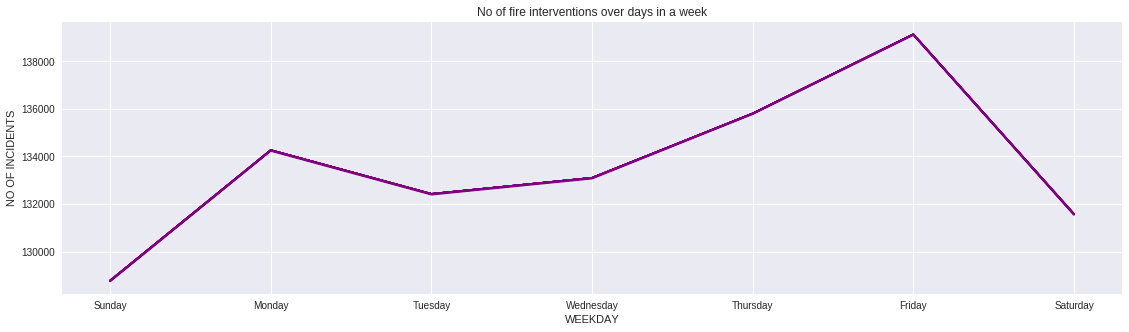

In [58]:
weekday_incidents = fire_df.groupby(fire_df.index.weekday_name).count()
sorter = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
weekday_incidents = weekday_incidents.reindex(sorter)

plt.figure(figsize=(19,5))
plt.title("No of fire interventions over days in a week")
plt.plot(weekday_incidents,c='purple')
plt.xlabel('WEEKDAY')
plt.ylabel("NO OF INCIDENTS")
plt.show()

**The no of incidents seems to be peaking on fridays. This could be because people go into party mode on fridays :)**

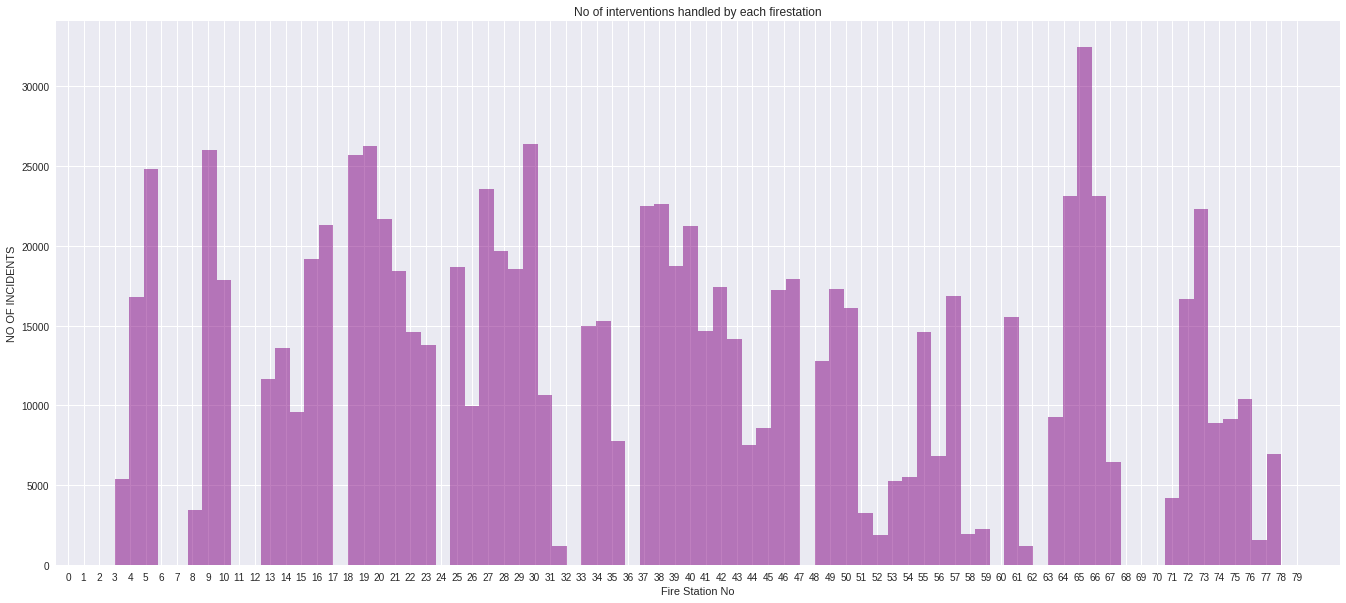

In [62]:
plt.figure(figsize=(23,10))
plt.hist(fire_df.caserne,bins=80,color='purple',alpha=0.5)
plt.title('No of interventions handled by each firestation')
plt.xticks(np.arange(80))
plt.xlabel("Fire Station No")
plt.ylabel("NO OF INCIDENTS")
plt.show()

**Fire Station 66 has been the busiest over the years**

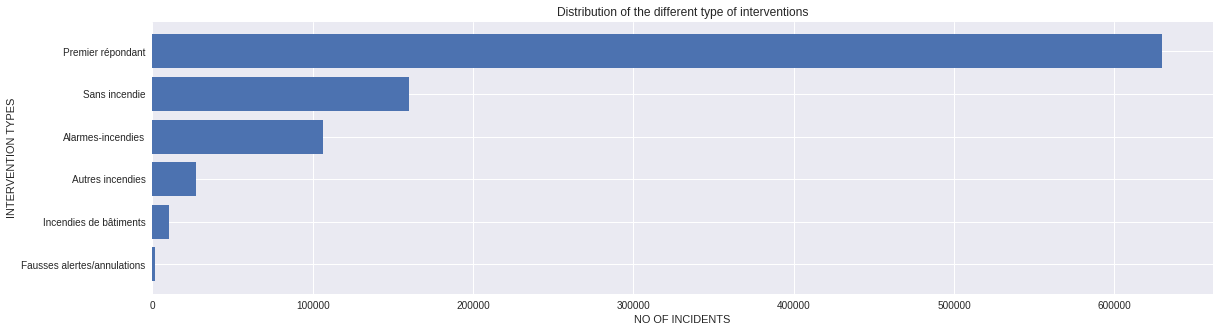

In [74]:
type = fire_df.groupby('description_groupe')[['nombre_unites']].count()
type = type.sort_values('nombre_unites')
plt.figure(figsize=(19,5))
plt.title("Distribution of the different type of interventions")
plt.barh(type.index,type.nombre_unites)
plt.xlabel("NO OF INCIDENTS")
plt.ylabel("INTERVENTION TYPES")
plt.show()


**Majority of the interventions were first respondent interventions.**

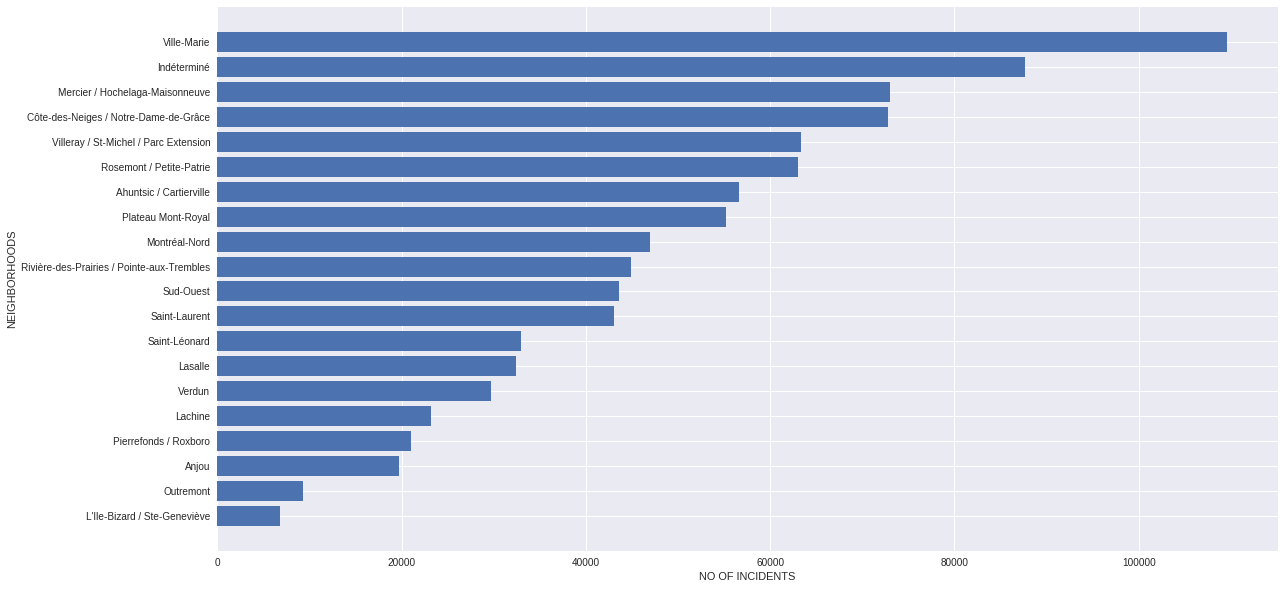

In [76]:
fire_df['nom_arrond'] = fire_df['nom_arrond'].astype('category')
arrond = fire_df.groupby('nom_arrond')[['nombre_unites']].count()
arrond = arrond.sort_values('nombre_unites')
arrond.columns
plt.figure(figsize=(19,10))
plt.barh(arrond.index,arrond.nombre_unites)
plt.xlabel("NO OF INCIDENTS")
plt.ylabel("NEIGHBORHOODS")
plt.show()

**Ville Marie has the most number of interventions**

In [81]:
fire_df['incident_type_desc'].unique()

[Premier répondant, Ac.véh./1R/s.v./ext/29B/D, Avertisseur de CO, Ascenseur, Alarme privé ou locale, ..., PR 10-07 Sauvetage en hauteur, PR nautique-glace, PR 10-07 effon tranchée, PR 10-07 espace clos, Deuxième alerte/autre que BAT]
Length: 145
Categories (145, object): [Premier répondant, Ac.véh./1R/s.v./ext/29B/D, Avertisseur de CO, Ascenseur,
                           ..., PR nautique-glace, PR 10-07 effon tranchée,
                           PR 10-07 espace clos, Deuxième alerte/autre que BAT]

**Each intervention type is further divided into sub types. There are totally 145 subtypes.**

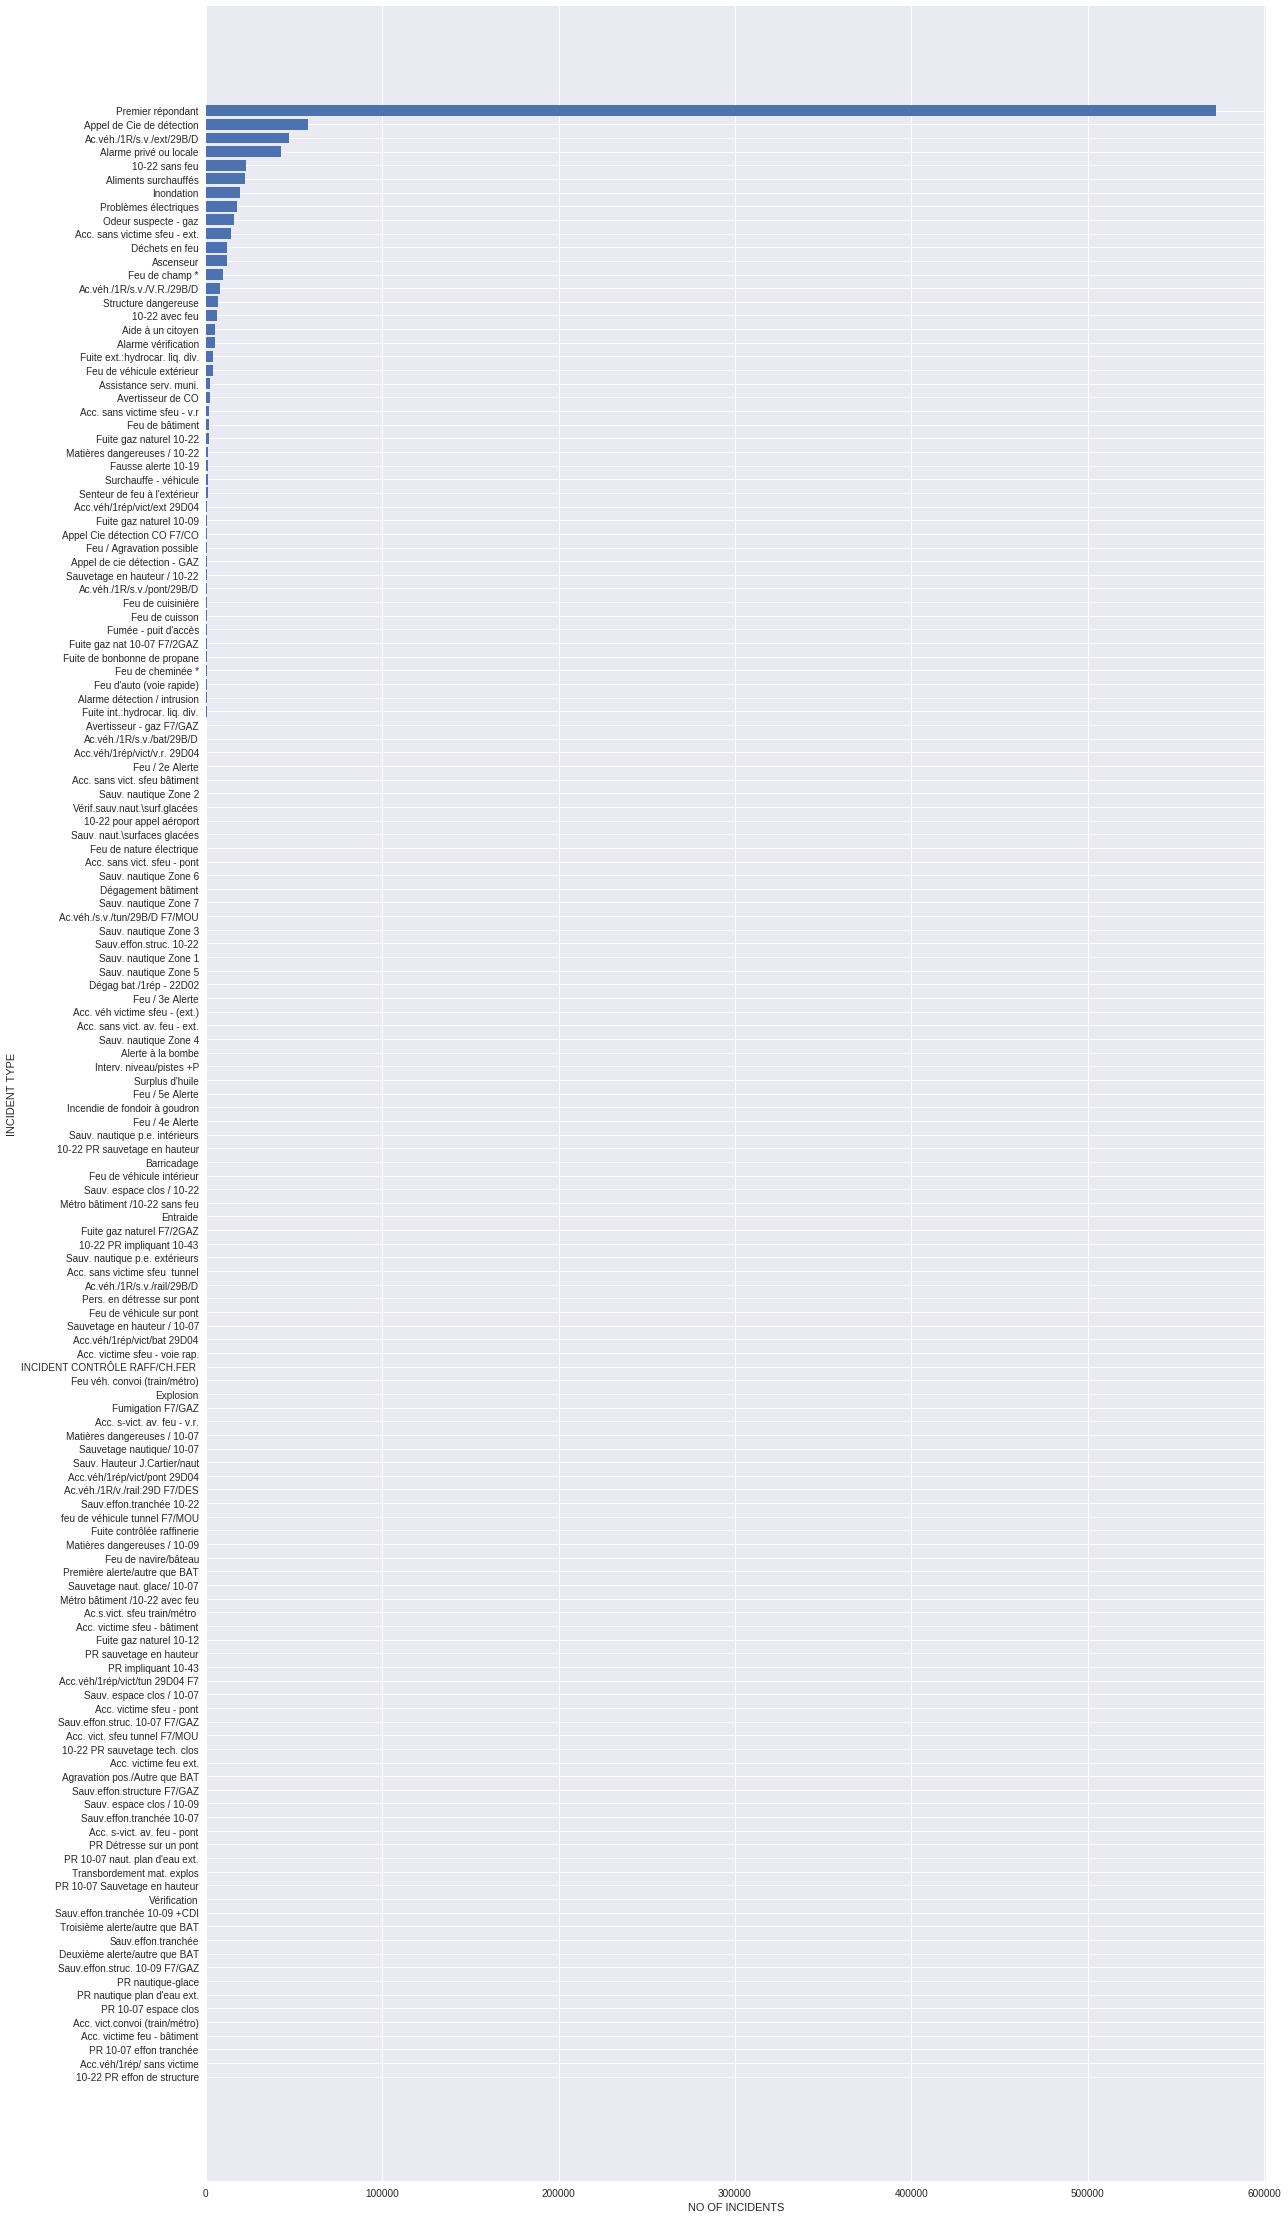

In [77]:
fire_df['incident_type_desc'] = fire_df['incident_type_desc'].astype('category')

arrond = fire_df.groupby('incident_type_desc')[['nombre_unites']].count()
arrond = arrond.sort_values('nombre_unites')
plt.figure(figsize=(19,40))
plt.barh(arrond.index,arrond.nombre_unites)
plt.xlabel("NO OF INCIDENTS")
plt.ylabel("INCIDENT TYPE")
plt.show()